<a href="https://colab.research.google.com/github/sgr1118/PyTorch/blob/main/Chapter13_%EC%8B%AC%EC%B8%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 13.1 이진 분류

### 1. 로지스틱 회귀 복습
- 8장 노트북 파일 참고

### 2. 심층신경망을 활용한 이진 분류

- 기존 $f_\theta$를 심층신경망으로 교체하면 된다. DNN을 구성하고 마지막에 소프트맥스 함수를 씌워준다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-13/01-dnn_binary_classifier.png)
<center></center>

- 이후에 모델을 $f_\theta$로 삼아 기존 이진 분류 학습 방식에 집어 넣는다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-13/01-dnn_binary_classification.png)
<center></center>

- BCE 손실 함수를 미분할 때 체인 룰을 통해 역전파가 적용되고 각 가중치 파라미터별로 GD가 적용되는 것을 제외하면 모든 동작이 똑같다.



## 13.2 DNN의 학습

### 1. 임곗값 설정과 그에 따른 상충 문제
- 시그모이드 함수에 의한 참/거짓을 판별할 때는 0.5를 기준으로 하였다. 하지만 경우에 따라 클래스 임계값이 하이퍼 파라미터가 되기도한다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-13/02-score_dist.png)
<center>이진 분류기를 통한 출력값</center>

- 위 그림은 이진 분류기를 통한 출력값이다. 빨간색 분포는 원래 정답이 참인 샘플의 모젤 출력값, 초록색 분포는 정답이 거짓인 샘플들의 모델 출력 값이다. 보시다싶이 일부 겹치는 구간이 확인된다.

- 이런 경우 해소자고자하는 문제에 따라 임계값을 설정할 필요가있다. 만약 참 클래스를 하나라도 놓치면 안되는 문제라면 임계값을 최대한 왼쪽으로 보내야한다.또는 참 클래스는 잘못 예측하는 것이 치명적인 상황이라면 임계값을 최대한 오른쪽으로 보내야한다.

- 임계값을 설정하기 위한 정책은 우리가 풀고자 하는 문제의 성격을 따른다.

### 2. 정답과 예측에 따른 명칭
![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-13/02-binary_confusion_matrix.png)
<center>이진 분류기를 통한 출력값</center>
- 모델이 1로 예측한다면 양성, 0으로 예측한다면 음성이라고 부르도록하겠다. 표를 참고해서 TP, FP, FN, TN 개념을 익히도록하자


### 3. 정확도 그리고 정밀도와 재현율
- 정확도는 전체 예측 중 실제로 맞춘 참의 개수 비율을 나타낸다. 정확도는 데이터 셋의 클래스가 불균형할 경우 모델의 성능을 정확하게 반영하지 못한다. 이때 우리가 고려하는 것은 정밀도, 재현율이다.

- 정밀도는 모델이 양성이라고 예측한 개수 중 실제로 양성인 경우다. 재현율은 실제로 양성 중에서 모델이 실제로 맞춘 양성인 경우다. 임계값 설정에 이 두 값은 상충된다. 같은 모델 안에서 임곗값을 바꾸게 되면 정밀도와 재현율이 서로 반대로 움직이는 것을 확인할 수 있다.

### 4. F1 점수
- 여러 측정 지표가 상존할 때 1개의 총점을 낼 수 있는 방법이다. F1은 임곗값이 고정되어 있을 때 정밀도와 재현율을 기반으로 계산된다. 만약 모델이 다양한 모델에 적용되어 임곗값이 달라진다면 F1도 바뀔것이다.

- $F1-Socre = 2 \cdot \frac{재현율 \cdot 정밀도}{재현율 + 정밀도}$ 

### 5. AUROC
- 바로 앞같은 상황에서 필요한 방법이다. 변화하는 임곗값에 따른 모델의 성능을 알고싶기 때문이다. 

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-13/02-auroc.png)
<center>검증 데이터셋에대한 모델 출력값의 분포와 AUROC를 통한 성능 평가</center>

- 왼쪽 그래프는 검증 데이터셋에 대한 모델 출력값이다. 겹치는 구간이 적을 수록 모델이 구분을 잘 해낸 것이다.

- AUROC를 구하는 방법은 다음과 같다. 임곗값을 움직이며 TP, FP의 비율을 계산하고 주황색 선처럼 표시한다. 이 주황색 선 아래 구간의 넓이가 auroc라고 한다. 모델이 좋은 성능을 가질수록 주황색 선이 좌상단에 꼭짓점에 가까이 붙게된다. 반대로 성능이 좋지않을 경우 파란색 점선에 가까워진다.

## 13.3 Deep Binary Classification

In [1]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

# 데이터 셋 불러오기

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#print(cancer.DESCR)

# 보스턴 데이터 df

df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['class'] = cancer.target

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Numpy 데이터를 파이토치 실수형 텐서로 변환

data = torch.from_numpy(df.values).float()

# 입력 x와 출력 y로 나눈기

x = data[:, :-1]
y = data[:, -1:]
print(x.shape, y.shape)

torch.Size([569, 30]) torch.Size([569, 1])


In [3]:
# 데이터 셋 나누기
ratios = [.6, .2, .2] 

train_cnt = int(data.size(0) * ratios[0])
valid_cnt = int(data.size(0) * ratios[1])
test_cnt = data.size(0) - (train_cnt + valid_cnt)
cnts = [train_cnt, valid_cnt, test_cnt]

print('Train %d / Valid %d / Test %d samples.' %(train_cnt, valid_cnt, test_cnt))

Train 341 / Valid 113 / Test 115 samples.


In [4]:
# 랜덤 샘플링 수행

indices = torch.randperm(data.size(0))

x = torch.index_select(x, dim = 0, index = indices)
y = torch.index_select(y, dim = 0, index = indices)

x = x.split(cnts, dim = 0)
y = y.split(cnts, dim = 0)

for x_i, y_i in zip(x, y):
    print(x_i.size(), y_i.size())

torch.Size([341, 30]) torch.Size([341, 1])
torch.Size([113, 30]) torch.Size([113, 1])
torch.Size([115, 30]) torch.Size([115, 1])


In [6]:
# 데이터 셋 정규화

scaler = StandardScaler()
scaler.fit(x[0].numpy()) # 반드시 학습 데이터만 정규화

x = [torch.from_numpy(scaler.transform(x[0].numpy())).float(),
     torch.from_numpy(scaler.transform(x[1].numpy())).float(),
     torch.from_numpy(scaler.transform(x[2].numpy())).float()]

### 2. 학습 코드 구현

- DNN을 nn.Sequential로 정의한다. 마지막에는 시그모이드 적용해준다.

In [10]:
# nn.Sequential

model = nn.Sequential(
    nn.Linear(x[0].size(-1), 25),
    nn.LeakyReLU(),
    nn.Linear(25,20),
    nn.LeakyReLU(),
    nn.Linear(20,15),
    nn.LeakyReLU(),
    nn.Linear(15,10),
    nn.LeakyReLU(),
    nn.Linear(10,5),
    nn.LeakyReLU(),
    nn.Linear(5, y[0].size(-1)),
    nn.Sigmoid()
)

optimizer = optim.Adam(model.parameters())

In [8]:
# 학습에 필요한 설정값을 정한다.

n_epochs = 10000
batch_size = 32
print_interval = 10
early_stop = 100
lowest_loss = np.inf
best_model = None
lowest_epoch = np.inf

In [11]:
# 학습 수행
# 앞서 코드와 다른점 : for문 후반부에 검증 작업을 위한 코드가 추가되었다는 것이다.

train_history, valid_history = [] ,[]

for i in range(n_epochs):
    # Shuffle the index to feed-forward
    indices = torch.randperm(x[0].size(0))
    x_ = torch.index_select(x[0], dim = 0, index = indices)
    y_ = torch.index_select(y[0], dim = 0, index = indices)

    x_ = x_.split(batch_size, dim = 0)
    y_ = y_.split(batch_size, dim = 0)

    train_loss, valid_loss = 0, 0
    y_hat = []
    
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i) # 손실함수 BCE 사용

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        train_loss += float(loss) # 메모리 부족을 방지하기 위하여 중요한 부분이다.
    
    train_loss = train_loss / len(x_)

# 검증 데이터셋 사용하기
# 검증 과정에서는 그래디언트 계산이 필요없기 때문에 torch.no_grad()를 사용하여 with내부에서 검증 작업을 진행

    with torch.no_grad():
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)

        valid_loss = 0
        
        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = F.binary_cross_entropy(y_hat_i, y_i)

            valid_loss += loss

            y_hat += [y_hat_i]

    valid_loss = valid_loss / len(x_)

    # 교육이 완료된 후 플롯에 각 손실을 기록합니다

    train_history += [train_loss]
    valid_history += [valid_loss]

    if (i+1) % print_interval == 0:
        print('Epoch %d: train_loss=%.4e valid_loss=%.4e lowest_loss = =%.4e' % (i+1, 
                                                                                 train_loss,
                                                                                 valid_loss,
                                                                                 lowest_loss))
    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        
        best_model = deepcopy(model.state_dict())
    
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i+1:
            print('%d epoch 이후 더 이상의 개선은 필요 없다.' % early_stop)
            break

print('%d 에포크가 가장 낮은 검증 손실이다. : %.4e' % (lowest_epoch + 1, lowest_loss))

# best model 저장

model.load_state_dict(best_model)

Epoch 10: train_loss=1.8449e-01 valid_loss=1.8883e-01 lowest_loss = =2.3492e-01
Epoch 20: train_loss=3.4568e-02 valid_loss=1.0535e-01 lowest_loss = =1.0442e-01
Epoch 30: train_loss=1.6197e-02 valid_loss=1.3597e-01 lowest_loss = =1.0442e-01
Epoch 40: train_loss=3.7407e-03 valid_loss=1.5872e-01 lowest_loss = =1.0442e-01
Epoch 50: train_loss=1.4815e-03 valid_loss=1.7875e-01 lowest_loss = =1.0442e-01
Epoch 60: train_loss=7.6983e-04 valid_loss=1.9754e-01 lowest_loss = =1.0442e-01
Epoch 70: train_loss=4.8885e-04 valid_loss=2.1359e-01 lowest_loss = =1.0442e-01
Epoch 80: train_loss=3.1051e-04 valid_loss=8.7605e-01 lowest_loss = =1.0442e-01
Epoch 90: train_loss=2.2898e-04 valid_loss=8.8057e-01 lowest_loss = =1.0442e-01
Epoch 100: train_loss=1.6354e-04 valid_loss=8.8564e-01 lowest_loss = =1.0442e-01
Epoch 110: train_loss=1.4236e-04 valid_loss=8.8971e-01 lowest_loss = =1.0442e-01
100 epoch 이후 더 이상의 개선은 필요 없다.
17 에포크가 가장 낮은 검증 손실이다. : 1.0442e-01


<All keys matched successfully>

### 3. 손실 곡선 확인
- 

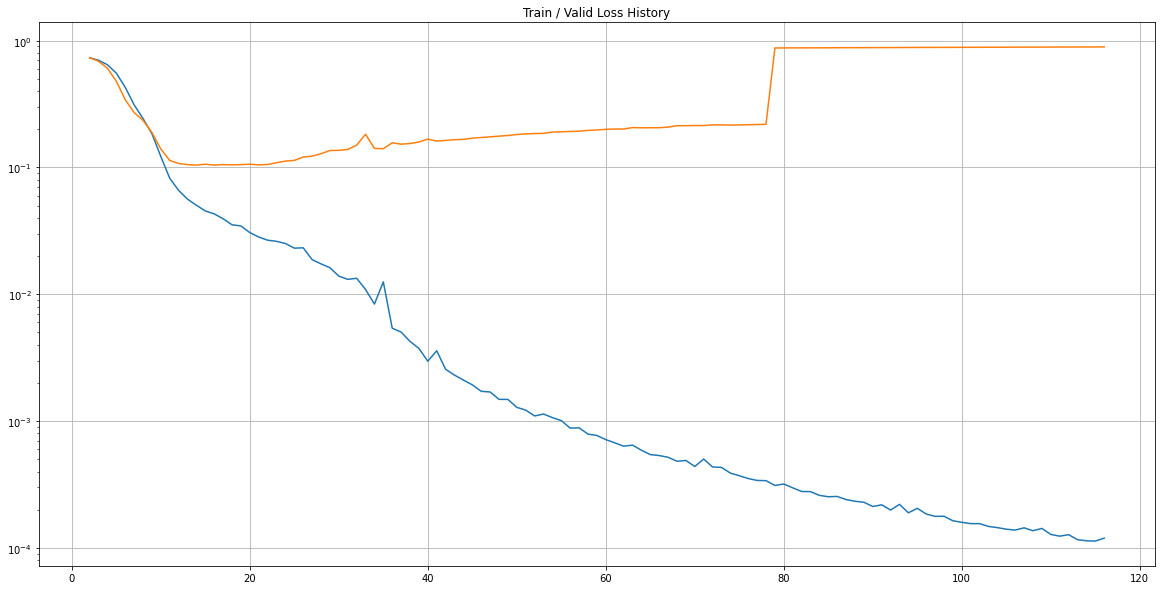

In [12]:
plot_from = 2

plt.figure(figsize=(20,10))
plt.grid('grid') # grid 추가
plt.title('Train / Valid Loss History')
plt.plot(
    range(plot_from, len(train_history)), train_history[plot_from:],
    range(plot_from, len(valid_history)), valid_history[plot_from:],)

plt.yscale('log')
plt.show()

# 초반에는 함께 내려가다가 약 16 ~ 17 epoch쯤에서 격차가 벌어지고있다.

### 4. 결과 확인

In [13]:
test_loss = 0
y_hat = []

with torch.no_grad():
    x_ = x[2].split(batch_size, dim = 0)
    y_ = y[2].split(batch_size, dim = 0)

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        test_loss += loss
        y_hat += [y_hat_i]

test_loss = test_loss / len(x_)
y_hat = torch.cat(y_hat, dim = 0)

sortd_history = sorted(zip(train_history, valid_history), key = lambda x: x[1])

print('Train_loss : %.4e' % sortd_history[0][0])
print('Valid_loss : %.4e' % sortd_history[0][1])
print('Test_loss : %.4e' % test_loss)

Train_loss : 4.3028e-02
Valid_loss : 1.0442e-01
Test_loss : 3.6664e-02


In [14]:
# 이진 분류 정확도 구하기

correct_cnt = (y[2] == (y_hat > .5)).sum()
total_cnt = float(y[2].size(0))

print('Test Accuracy: %.4f' % (correct_cnt / total_cnt))

Test Accuracy: 0.9913


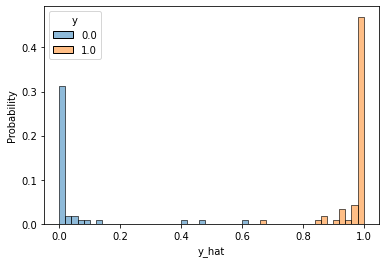

In [16]:
df = pd.DataFrame(torch.cat([y[2], y_hat], dim = 1).detach_().numpy(),
                  columns = ['y', 'y_hat'])

sns.histplot(df, x = 'y_hat', hue = 'y', bins = 50, stat = 'probability')
plt.show()


In [17]:
# sklearn을 활용하는 방법

from sklearn.metrics import roc_auc_score

roc_auc_score(df.values[:, 0], df.values[:, 1])

# 클래스가 확연하게 구분되어있다.

1.0

## 13.4 심층신경망을 활용한 분류

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-13/04-binary_classification_example.png)
<center>이진 분류 문제로 표현</center>

- 이진 분류 경우 클래스가 두 개뿐이라서 한 클래스의 확률 값을 알면 다른 클래스 확률을 바로 알 수 있다. 입력 x가 각 클래스에 속할 확률 값을 출력한다고 생각할 수있다. 이를 다중 클래스 분류로 확장 할 수 있다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-13/04-classification_example.png)
<center>다중 분류 문제로 확장</center>

- 모델의 출력 벡터는 각 후보 클래스에 대한 조건부 확률 값으 요소로 가지고 있도록 한다. 위 그림의 확률 값 위에 0, 1로만 채워진 정답 벡터에 주목하라 이 정답 벡터는 원-핫 벡터인데 각 클래스별 확률 값이 담긴 모델 $\hat{y}$와 실제 정답 레이블 벡터 $y$를 비교하면 손실 값을 얻을 수있다. 우리는 이 손실 값을 최소로하는 모델의 파라미터를 찾아야 한다.

### 1. 분류 문제를 위한 DNN의 구조롸와 손실 함수

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-13/04-classifier.png)
<center>DNN에서의 소프트맥수 함수 적용</center>

- 이진 분류 문제에서 시그모이드를 사용한 것처럼 일반 분류 문제를 해결하기 위해 소프트맥스를 활용한다. 

- 중요한 것은 이진 분류의 경우 출력 벡터 $\hat{y}$의 차원만큼 별도의 이진 분류 문제가 있었던 것에 비해 일반 다중 클래스 분류의 경우에는 한 모델이 하나의 분류 문제만 풀 수 있다.

- 다시 자세히 설명하면 소프트맥스는 벡터를 입력 받으면 각 차원이 상호 작용으로 출력 벡터가 계산된다. 소프트맥스에서 분류 문제로 동물 이미지를 받는다면 출력 벡터의 각 차원은 해당 이미지가 어떤 동물 클래스에 속할지에 대한 확률 값이 들어있을 것이다.

### 2. 회귀 vs 분류
- 각 문제들을 다른 형태의 타깃 값을 문제에 따라 각기 다른 손실 함수와 마지막 계층의 활성 함수를 활용해야 한다.

|문제|타깃 값|마지막 계층의 활성 함수|손실 함수|예제|
|-|-|-|-|-|
|회귀|연속형 벡터|없음|MSE|주어진 신상 정보를 바탕으로 연봉 예측|
|이진 분류|0 or 1|시그모이드|BCE|주어진 신상 정보를 바탕으로 성별 예측|
|분류|카테고리 or 이산 값|소프트맥스|CE|주어진 신상 정보를 바탕으로 직업군 예측|

## 13.5 소프트맥수 함수와 교차 앤트로피 손실 함수

### 1. 소프트맥스 함수
- 소프트맥스 함수는 임의의 벡터를 입력 받아 이산 확률 분포의 형태로 출력을 반환, 따라서 출력 벡터의 합은 1이다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-13/05-softmax.png)
<center>소프트맥스 함수 적용</center>

- 다음과 같은 임의의 벡터가 있다. 벡터 v에서 가장 큰 값의 인덱스를 찾기 위한 맥스 함수를 활용하면 아래와 같은 결과가 나온다.
- $ v = \begin{bmatrix}
-7 \\
5 \\
10 
\end{bmatrix}$

- $ max(v) = \begin{bmatrix}
0 \\
0 \\
1 
\end{bmatrix}$

#### 소프트맥스 함수의 수식
- $softmax_{i}(x) = \frac{\epsilon^{x_{i}}}{\sum_{j=1}^n \epsilon^{x_{i}}}$
- $where x \in \mathbb{R^n}$

- 수식을 보면 i번째 차원의 결정하기 위해 j=1 부터 n까지 다른 차원이 관여한다. 소프트맥스 함수는 벡터 내의 다른 차원돠 상호작용하여 해당 차원의 값이 결정된다. 따라서 전체 소프트맥스 함수의 수식은 다음과 같다.

- $softmax \begin{pmatrix} & \begin{bmatrix}
x_i \\
\vdots \\
x_n 
\end{bmatrix} & \end{pmatrix} = \begin{bmatrix}
softmax(x_i) \\
\vdots \\
softmax_{n}(x_n) 
\end{bmatrix}, where x = \begin{bmatrix}
x_i \\
\vdots \\
x_n 
\end{bmatrix}$

- 소프트맥스 함수의 결과는 각 차원에 대한 소프트맥스 결과를 모아서 벡터로 만든 것이라고 볼 수 있을 것이다. 이 소프트맥스 함수에 l개의 게층을 가진 DNN의 마지막 계층 결괏값을 집어넣는다.

- 그 이후 함수 결괏값을 다음 수식과 같이 모델의 출력 벡터 $\hat{y}$로 삼을 것이다. 이 출력 벡터는 입력 x가 주어졌을 때 입력 샘플이 어떤 클래스에 속할지에 대한 조건부 확률 분포로 볼 수 있다. 수식은 아래와 같다.

- $P_{\theta}(\cdot|x) \approx \hat(y) = softamx(h_{l})$

### 2. 교차 엔트로피 손실 함수
- 이진 분류 손실함수로 BCE를 사용했었다. 다중 클래스 분류 문제는 이진 분류 문제의 일반화 버전이기 때문에 마찬가지로 BCE 손실 함수의 일반 버전인 CE 손실 함수를 사용한다. 다음 수식은 N개 샘플에 대한 손실 값을 구하기 위한 CE 손실 함수를 나타낸 것이다.

- $CE(y_{1:N}, \hat{y}_{1:N}) = -\frac{1}{N} \sum_{i=1}^N y_{i}^T \cdot log\hat{y}_i$
- $where y_{1:N} \in {0,1}^N*m and \hat{y}_{1:N} \in [0,1]^N*m$

- 기존에 사용한 BCE와 다른 점은 전체 m개의 클래스에 대해서 정답이 각 클래스일 때의 텀들을 더하도록 한다. 이 수식에서 $\hat{y}$는 소프트맥스 함수의 결과값이다. 이걸 다시 수식으로 표현하면 다음과 같다.

- $CE(y_{1:N}, \hat{y}_{1:N}) = -\frac{1}{N} \sum_{i=1}^N y_{i}^T \cdot log\hat{y}_i$
- $-\frac{1}{N} \sum_{i=1}^N y_{i}^T logP_{\theta}(y_i|x_i)$

- 다음과 같은 간단한 예시를 참고하자.

- $ y_i = \begin{bmatrix}
0 \\
0 \\
1 \\
0 
\end{bmatrix} and 
P_{\theta}(y_i|x_i) = 
\hat{y}_i = \begin{bmatrix}
.2 \\
.1 \\
.65 \\
.05 
\end{bmatrix}
$

- 이 두 벡터를 내적하면 다음과 같다

- $y_i^T \cdot log \hat{y}_i = [0,0,1,0] * log \begin{bmatrix}
.2 \\
.1 \\
.65 \\
.05 
\end{bmatrix}$
- $0 * log0.2 + 0 * log0.1 + 1 * log0.65 + 0 * log0.05 = log0.65 = logP_{\theta}(y = 2|x_i)$

- 즉 CE는 입력 $x_i$가 주어졌을 때 정답 클래스에 대한 로그 조건부 확률 값을 구하는 과정이다. 따라서 우리는 로그 확률 값이 최대화되도록 파라미터를 움직여야 하는데 전체 손실 함수 입장에서는 가장 바깥쪽에 마이너스가 붙어 있으므로 최소화 문제로 바뀌게 된다.

### 3. 로그소프트맥스 함수와 음의 로그 가능도 손실 함수
- 파이토치에서는 음의 가능도 손실 함수를 제공한다. 로그소프트맥스 함수도 제공하는데 그냥 소프트맥스에 로그를 취한 것과 같다. 수식 첫줄에서 로그를 쓰지 않음을 주의하자.

- $NLL(y_{1:N}, \hat{y}_{1:N}) = -\frac{1}{N} \sum_{i=1}^N y_{i}^T \cdot \hat{y}_i$
- $where \hat{y} = logP_{\theta}(y_i|x_i) from log-softmax$

- 즉, 소프트맥스 함수에 CE 손실 함수를 사용하는 것은 로그소프트맥스 함수에 NLL 손실 함수를 사용하는 것과 같은 결과를 가진다.

## 13.6 다중 클래스 분류 결과 분석하기

### 1. 혼돈 행렬

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-13/06-confusion_matrix.png)
<center>MNIST 분류에 대한 테스트셋 예측 결과를 바탕으로 한 혼동 행렬표</center>

- 각 true행과 pred열이 일치하는 경우가 모델이 정확하게 예측한 것이다.

## 13.7 Deep Classification
- MINST 데이터셋을 사용하여 다중 분류를 수행한다.

### 1. 데이터 준비

In [5]:
# 라이브러리 불러오기

import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import datasets, transforms

# 데이터 셋 불러오기

train = datasets.MNIST(
    '../data', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]),)

test = datasets.MNIST(
    '../data', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]),)

In [6]:
# 데이터 특성 확인

def plot(x):
    img = (np.array(x.detach().cpu(), dtype = 'float')).reshape(28,28)
    plt.imshow(img, cmap = 'gray')
    plt.show()

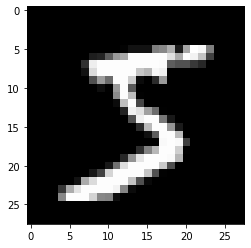

In [7]:
# 데이터 확인

plot(train.data[0])

In [8]:
# 이미지 데이터 Flatten하기

x = train.data.float() / 255.
y = train.targets

x = x.view(x.size(0), -1)
print(x.shape, y.shape)

torch.Size([60000, 784]) torch.Size([60000])


In [9]:
# 흑백이미지 동작 코드 작성

input_size = x.size(-1)
output_size = int(max(y)) + 1

print('input_size: %d, output_size: %d' % (input_size, output_size))

# 10개의 확률을 뱉어낸다.

input_size: 784, output_size: 10


In [10]:
# 데이터셋 나누기
ratios = [.8, .2]

train_cnt = int(x.size(0) * ratios[0])
valid_cnt = int(x.size(0) * ratios[1])
test_cnt = len(test.data)
cnts = [train_cnt, valid_cnt]

print("Train %d / Valid %d / Test %d samples." % (train_cnt, valid_cnt, test_cnt))

# 랜덤 샘플링 수행

indices = torch.randperm(x.size(0))

x = torch.index_select(x, dim=0, index=indices)
y = torch.index_select(y, dim=0, index=indices)

x = list(x.split(cnts, dim=0)) # list로 바꾸지 않으면 tuple error가 발생한다.
y = list(y.split(cnts, dim=0))

x += [(test.data.float() / 255.).view(test_cnt, -1)]
y += [test.targets]

for x_i, y_i in zip(x, y):
    print(x_i.size(), y_i.size())

Train 48000 / Valid 12000 / Test 10000 samples.
torch.Size([48000, 784]) torch.Size([48000])
torch.Size([12000, 784]) torch.Size([12000])
torch.Size([10000, 784]) torch.Size([10000])


### 2. 학습 코드 구현
- MNIST 데이터셋의 이미지는 변환을 통해 784개 요소를 갖는 1차원 벡터가 됐다. 모델은 784차원 벡터를 받아 10개의 클래스에 속할 확률 값을 각각 출력해야한다.

In [11]:
# nn.Sequential

model = nn.Sequential(
    nn.Linear(input_size, 500),
    nn.LeakyReLU(),
    nn.Linear(500,400),
    nn.LeakyReLU(),
    nn.Linear(400,300),
    nn.LeakyReLU(),
    nn.Linear(300,200),
    nn.LeakyReLU(),
    nn.Linear(200,100),
    nn.LeakyReLU(),
    nn.Linear(100,50),
    nn.LeakyReLU(),
    nn.Linear(50, output_size),
    nn.LogSoftmax(dim = -1) # NLL 함수를 마지막에 적용
)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=500, out_features=400, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=400, out_features=300, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=300, out_features=200, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=200, out_features=100, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=100, out_features=50, bias=True)
  (11): LeakyReLU(negative_slope=0.01)
  (12): Linear(in_features=50, out_features=10, bias=True)
  (13): LogSoftmax(dim=-1)
)


In [14]:
# optimizer 선언

optimizer = optim.Adam(model.parameters())
crit = nn.NLLLoss()

In [15]:
# GPU를 사용할 수 없어 CPU를 사용

device = torch.device('cpu')

if torch.cuda.is_available():
    device = torch.device('gpu')

In [16]:
model = model.to(device)

x = [x_i.to(device) for x_i in x]
y = [y_i.to(device) for y_i in y]

In [17]:
# 학습에 필요한 설정값을 정한다.

n_epochs = 1000
batch_size = 256
print_interval = 10

lowest_loss = np.inf
best_model = None

early_stop = 50
lowest_epoch = np.inf

In [18]:
# 학습 수행
# 앞서 코드와 다른점 : for문 후반부에 검증 작업을 위한 코드가 추가되었다는 것이다.

train_history, valid_history = [] ,[]

for i in range(n_epochs):
    # Shuffle the index to feed-forward
    indices = torch.randperm(x[0].size(0)).to(device)
    x_ = torch.index_select(x[0], dim = 0, index = indices)
    y_ = torch.index_select(y[0], dim = 0, index = indices)

    x_ = x_.split(batch_size, dim = 0)
    y_ = y_.split(batch_size, dim = 0)

    train_loss, valid_loss = 0, 0
    y_hat = []
    
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = crit(y_hat_i, y_i.squeeze()) # 손실함수 NLL 사용

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        train_loss += float(loss) # 메모리 부족을 방지하기 위하여 중요한 부분이다.
    
    train_loss = train_loss / len(x_)

# 검증 데이터셋 사용하기
# 검증 과정에서는 그래디언트 계산이 필요없기 때문에 torch.no_grad()를 사용하여 with내부에서 검증 작업을 진행

    with torch.no_grad():
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)

        valid_loss = 0
        
        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = crit(y_hat_i, y_i.squeeze())

            valid_loss += loss

            y_hat += [y_hat_i]

    valid_loss = valid_loss / len(x_)

    # 교육이 완료된 후 플롯에 각 손실을 기록합니다

    train_history += [train_loss]
    valid_history += [valid_loss]

    if (i+1) % print_interval == 0:
        print('Epoch %d: train_loss=%.4e valid_loss=%.4e lowest_loss = =%.4e' % (i+1, 
                                                                                 train_loss,
                                                                                 valid_loss,
                                                                                 lowest_loss))
    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        
        best_model = deepcopy(model.state_dict())
    
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i+1:
            print('%d epoch 이후 더 이상의 개선은 필요 없다.' % early_stop)
            break

print('%d 에포크가 가장 낮은 검증 손실이다. : %.4e' % (lowest_epoch + 1, lowest_loss))

# best model 저장

model.load_state_dict(best_model)

Epoch 10: train_loss=2.2007e-02 valid_loss=1.0135e-01 lowest_loss = =9.7767e-02
Epoch 20: train_loss=1.0543e-02 valid_loss=1.3170e-01 lowest_loss = =9.7767e-02
Epoch 30: train_loss=5.6971e-03 valid_loss=1.3319e-01 lowest_loss = =9.7767e-02
Epoch 40: train_loss=7.4530e-03 valid_loss=1.3302e-01 lowest_loss = =9.7767e-02
Epoch 50: train_loss=3.8901e-03 valid_loss=1.2039e-01 lowest_loss = =9.7767e-02
50 epoch 이후 더 이상의 개선은 필요 없다.
9 에포크가 가장 낮은 검증 손실이다. : 9.7767e-02


<All keys matched successfully>

### 3. 손실 곡선 확인

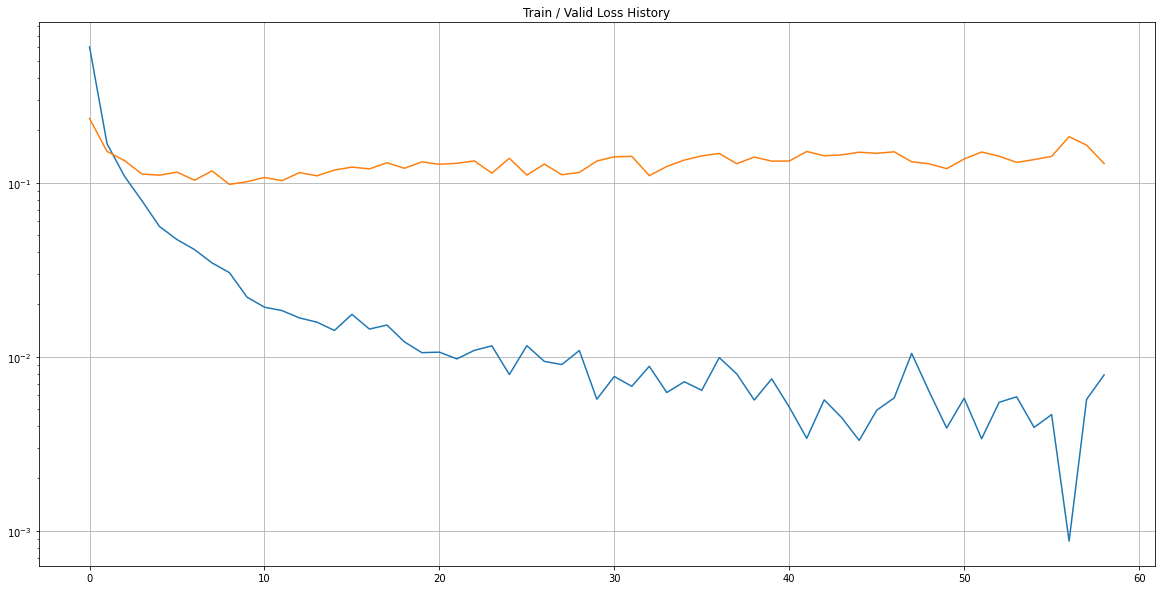

In [19]:
plot_from = 0

plt.figure(figsize=(20,10))
plt.grid('grid') # grid 추가
plt.title('Train / Valid Loss History')
plt.plot(
    range(plot_from, len(train_history)), train_history[plot_from:],
    range(plot_from, len(valid_history)), valid_history[plot_from:],)

plt.yscale('log')
plt.show()

# 학습 초반에 낮은 검증 손실 값을 찍은 후 점차 천천히 검증 손실 값이 오르고있다.
# 학습 손실 값은 후반에 급격히 떨어지고 다시 오르는 모습을 볼 수 있다.

### 4. 결과 확인

In [20]:
test_loss = 0
y_hat = []

with torch.no_grad():
    x_ = x[-1].split(batch_size, dim = 0)
    y_ = y[-1].split(batch_size, dim = 0)

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = crit(y_hat_i, y_i)

        test_loss += loss
        y_hat += [y_hat_i]

test_loss = test_loss / len(x_)
y_hat = torch.cat(y_hat, dim = 0)

sortd_history = sorted(zip(train_history, valid_history), key = lambda x: x[1])

# print('Train_loss : %.4e' % sortd_history[0][0])
# print('Valid_loss : %.4e' % sortd_history[0][1])
print('Test_loss : %.4e' % test_loss)

Test_loss : 8.1498e-02


- 분류 문제를 다루고 있으므로 신경망의 마지막 계층은 확률 값 또는 로그 확률 값을 나타내고 있을 것이다. 따라서 마지막 출력값 중 가장 높은 값을 가지는 있는 클래스 인덱스가 모델이 예측한 클래스의 인덱스라고 볼 수 있다. 이는 argmax를 통해 구현할 수 있다.

In [21]:
correct_cnt = (y[-1].squeeze() == torch.argmax(y_hat, dim = -1)).sum()
total_cnt = float(y[-1].size(0))

print('Test Accuracy: %.4f' % (correct_cnt / total_cnt))

Test Accuracy: 0.9766


In [22]:
# 혼동 행렬 나타내기

import pandas as pd
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y[-1], torch.argmax(y_hat, dim = -1)),
             index = ['true_%d' % i for i  in range(10)],
             columns = ['pred_%d' % i for i  in range(10)])

# 대부분 분류를 잘 수행한 것으로 나타났다. 앞서 구한 정확도에서 이미 높게 나왔기에 당연한 결과이다.

,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9
true_0,970,0,0,1,1,0,3,3,0,2
true_1,0,1123,3,4,0,0,1,1,3,0
true_2,3,0,1007,8,1,0,1,5,7,0
true_3,0,0,0,998,0,4,0,4,1,3
true_4,1,2,4,0,962,0,5,1,0,7
true_5,3,0,0,17,3,853,11,2,2,1
true_6,7,3,1,1,1,1,942,0,2,0
true_7,1,3,12,7,0,0,0,998,0,7
true_8,0,2,3,9,3,5,9,4,934,5
true_9,4,3,0,8,6,1,0,6,2,979


## 13.8 마치며

### 요약

1. 분류 문제 평가 지표
 - 정밀도 : 모델이 정답이라고 예측한 샘플 중에서 실제 정답의 비율
 - 재현율 : 실제 정답 중에서 모델이 맞춘 비율
 - 임계값 설정에 따른 모델의 성격 변화
 -- 임계값이 높을 때 : 정밀도가 높아지지만 재현율이 내려감
 -- 임계값이 낮을 때 : 재현율이 높아지지만 정밀도가 내려감
 - AUROC : ROC 곡선 아래 면적의 넓이, 모델이 강인할수록 수치가 높아진다.
 - F1 점수

2. DNN을 활용한 분류
 - DNN의 마지막에 소프트맥스 함수를 사용해 분류기로 만든다.
 - 소프트맥스 : 입력 벡터를 이산 확률 분포 형태의 벡터로 출력
 - 출력 벡터의 각 차원은 각 클래스별 확률 값이 들어있다.
 - CE를 손실 함수로 사용하여 학습을 수행
 - '소프트맥스 + CE'를 사용하는 것은 '로그 소프트맥스 + NLL 손실 함수'를 사용하는 것과 같다.

3. DNN을 할용한 분류 수식 (위에 수식 정리한 내용 참고)

4. 각 문제들을 다른 형태의 타깃 값을 문제에 따라 각기 다른 손실 함수와 마지막 계층의 활성 함수를 활용해야 한다.

|문제|타깃 값|마지막 계층의 활성 함수|손실 함수|예제|
|-|-|-|-|-|
|회귀|연속형 벡터|없음|MSE|주어진 신상 정보를 바탕으로 연봉 예측|
|이진 분류|0 or 1|시그모이드|BCE|주어진 신상 정보를 바탕으로 성별 예측|
|분류|카테고리 or 이산 값|소프트맥스|CE|주어진 신상 정보를 바탕으로 직업군 예측|